
## Example:

In [46]:
import ares
import numpy as np
from test_fitting_dm import interp_dTb
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from astropy import units as u

In [2]:
cores = 24
N_v_streams = 96

# assumptions about the dark matter mass and rms stream velocity
# m_chi_true = 10 # GeV
V_rms_true = 29000 # m/s

# sampling
# N_observations = 50 # number of observations
z_sample = np.linspace(0, 1100, 300) # redshifts corresponding to these observations
dTb_accurate_01 = interp_dTb(param=[0.1, V_rms_true], z=z_sample, 
cores=cores, N_v_streams=N_v_streams, verbose=1)
dTb_accurate_1 = interp_dTb(param=[1, V_rms_true], z=z_sample, 
cores=cores, N_v_streams=N_v_streams, verbose=1)
dTb_accurate_10 = interp_dTb(param=[10, V_rms_true], z=z_sample, 
cores=cores, N_v_streams=N_v_streams, verbose=1)

96 v_streams will be generated for m_chi = 0.1 GeV and V_rms = 29000 m/s...
Sampling 96 dTb's by 24 CPUs parallelly...
It costs 0:00:32.633541 to calculate dTb of 96 different initial_v_streams by 24 CPUs.
file_names = ['76010.65263157895.npy', '45789.94736842105.npy', '50368.84210526316.npy', '56779.29473684211.npy', '19232.357894736844.npy', '28390.147368421054.npy', '72347.53684210527.npy', '87000.0.npy', '40295.27368421053.npy', '78757.98947368421.npy', '52200.4.npy', '41211.05263157895.npy', '46705.72631578948.npy', '4579.894736842105.npy', '61358.189473684215.npy', '55863.515789473684.npy', '23811.252631578947.npy', '64105.52631578947.npy', '5495.6736842105265.npy', '84252.66315789474.npy', '53116.178947368426.npy', '1832.5578947368422.npy', '12821.905263157896.npy', '6411.452631578948.npy', '67768.64210526316.npy', '43958.38947368421.npy', '74179.0947368421.npy', '37547.936842105264.npy', '24727.031578947368.npy', '86084.22105263158.npy', '39379.494736842105.npy', '29305.9263157

In [102]:
pf = {
    'radiative_transfer': False,
    'verbose': False,
    'dark_matter_heating': False,
    'include_cgm': False,
    'initial_redshift': 1010,
    'include_He': True
}
sim = ares.simulations.Global21cm(**pf)
sim.run()

In [104]:
t_sec = 1000 * u.s
print(t_sec)
t_Myr = t_sec.to('Myr')
print(t_Myr)
print(t_Myr.value)
print(u.s.to('Myr'))

1000.0 s
3.168808781402895e-11 Myr
3.168808781402895e-11
3.168808781402895e-14


In [105]:
print(sim.history.keys())

dict_keys(['igm_Tk', 'igm_e', 'igm_h_1', 'igm_h_2', 'igm_he_1', 'igm_he_2', 'igm_he_3', 'igm_rho', 'igm_n', 'igm_Ja', 'igm_Jc', 'igm_Ji', 'igm_Jlw', 'igm_dTb', 'igm_Ts', 'dTb', 'Ts', 'Jc', 'Ji', 'Ja', 'Jlw', 'igm_k_ion', 'igm_k_heat', 'igm_k_ion2', 'igm_k_heat_lya', 'cgm_k_ion', 'cgm_k_heat', 'cgm_k_ion2', 'cgm_k_heat_lya', 'cgm_Jc', 'cgm_Ji', 'cgm_Ja', 't', 'z', 'Tr'])


675
0.0


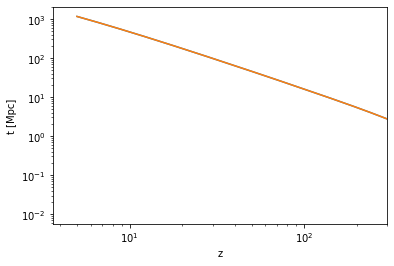

In [114]:
# plt.plot(sim.history['z'], sim.history['t'])
plt.xscale('log')
# plt.yscale('log')
# print(np.unique(sim.history['z']).shape == sim.history['z'].shape)
# print(np.unique(sim.history['t']).shape == sim.history['t'].shape)
# print(np.unique(sim.history['t']).shape)
# print(sim.history['t'].shape)
# print(sim.history['t'][-30:])
# print(sim.history['t'][:30])
# plt.plot(sim.history['t'])

last_zero = np.sum(sim.history['t']==0)
print(last_zero)
plt.plot(sim.history['z'], sim.history['t']*(u.s.to('Myr')))
plt.plot(sim.history['z'][last_zero:], sim.history['t'][last_zero:]*(u.s.to('Myr')))
plt.xlim(0,300)
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('t [Mpc]')
print(sim.history['t'].min())

In [115]:
z2t = interp1d(sim.history['z'], sim.history['t']*(u.s.to('Myr')), kind='linear', fill_value='extrapolate')
print('first done')
t2z = interp1d(z2t(sim.history['z'][last_zero:]), sim.history['z'][last_zero:], kind='linear', fill_value='extrapolate')

first done


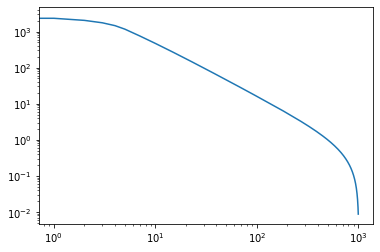

In [112]:
z_300 = np.arange(1000)
t_300 = z2t(z_300)
plt.plot(z_300, t_300)
plt.xscale('log')
plt.yscale('log')

In [118]:
z2t(200)

array(5.4104502)

In [145]:
def z2nu(z):
    nu = 1420 / (1+z)
    return nu

def nu2z(nu):
    z = 1420 / nu - 1
    return z

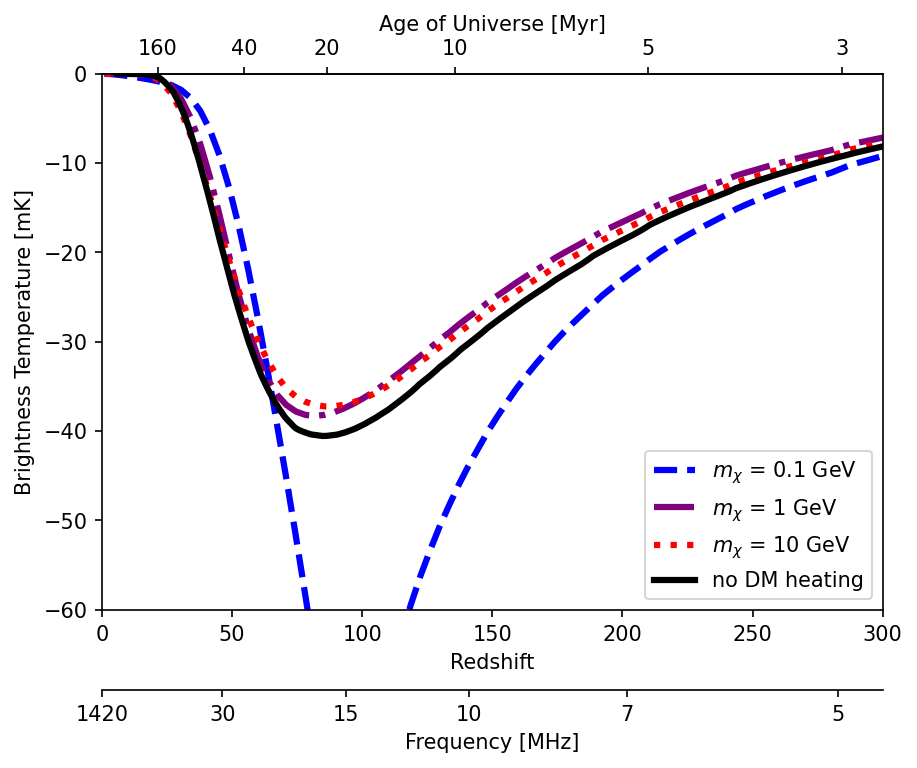

In [164]:
# plt.plot(z_sample, dTb_accurate_1)
# plt.plot(z_sample, dTb_accurate_2)
# plt.figure(figsize=(12,8), dpi=200)
fig, ax = plt.subplots(constrained_layout=True, dpi=150, figsize=(6,5))
ax.plot(z_sample+1, dTb_accurate_01, "b--", label=r"$m_\chi$ = 0.1 GeV", lw=3)
ax.plot(z_sample+1, dTb_accurate_1, "purple", linestyle = "-.", label=r"$m_\chi$ = 1 GeV", lw=3)
ax.plot(z_sample+1, dTb_accurate_10, "r:", label=r"$m_\chi$ = 10 GeV", lw=3)
ax.plot(sim.history['z']+1, sim.history['dTb'], "k-", label="no DM heating", lw=3)
# plt.plot(z_sample, dTb_accurate_6)
ax.set_xlim([0,300])
ax.set_ylim([-60,0])
ax.set_xlabel("Redshift")
# ax.set_xticks([10,20,25])
ax.set_ylabel("Brightness Temperature [mK]")
secax = ax.secondary_xaxis('top', functions=(z2t, t2z))
secax.set_xlabel("Age of Universe [Myr]")
secax.set_ticks([3,5,10,20,40,160])

thirdax = ax.secondary_xaxis(-0.15, functions=(z2nu, nu2z))
thirdax.set_xlabel('Frequency [MHz]')
thirdax.set_xticks([5, 7, 10, 15, 30, 1420])

plt.legend()

(-60.0, 0.0)

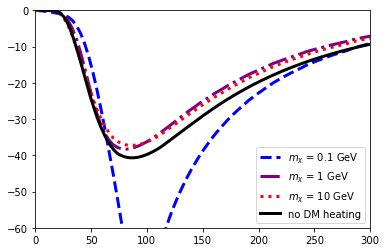

In [4]:
# plt.plot(z_sample, dTb_accurate_1)
# plt.plot(z_sample, dTb_accurate_2)
plt.plot(z_sample, dTb_accurate_01, "b--", label=r"$m_\chi$ = 0.1 GeV", lw=3)
plt.plot(z_sample, dTb_accurate_1, "purple", linestyle = "-.", label=r"$m_\chi$ = 1 GeV", lw=3)
plt.plot(z_sample, dTb_accurate_10, "r:", label=r"$m_\chi$ = 10 GeV", lw=3)
plt.plot(sim.history['z'], sim.history['dTb'], "k-", label="no DM heating", lw=3)
# plt.plot(z_sample, dTb_accurate_6)
plt.legend()
plt.xlim([0,300])
plt.ylim([-60,0])

In [1]:
import numpy as np
from test_fitting_dm import interp_dTb, fit_param

cores = 24
N_v_streams = 24

# assumptions about the dark matter mass and rms stream velocity
m_chi_true = 0.05 # GeV
V_rms_true = 35000 # m/s

# sampling
N_observations = 50 # number of observations
z_sample = np.linspace(0, 1100, 300) # redshifts corresponding to these observations
dTb_accurate = interp_dTb(param=[m_chi_true, V_rms_true], z=z_sample, 
cores=cores, N_v_streams=N_v_streams, verbose=1)
# mK. std of the signal noise, assumed to be Gaussian and frequency-independent
noise = 1
dTb_sample = dTb_accurate + noise * np.random.normal(size=(N_observations, 
z_sample.shape[0]))

# fitting
fit_result = fit_param(z_sample, dTb_sample, cores=cores, 
N_v_streams=N_v_streams, save_name=
f"m_chi{m_chi_true}-V_rms{V_rms_true}-N_v_stream{N_v_streams}.npy", verbose=0)

24 v_streams will be generated for m_chi = 0.05 GeV and V_rms = 35000 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:09.430575 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------
Fitting starts...
kwargs = {'N_v_streams': 24, 'verbose': 0, 'bounds': array([[1.e-03, 1.e+04],
       [1.e+02, 1.e+05]])}


Process ForkPoolWorker-144:
Process ForkPoolWorker-143:
capi_return is NULL
capi_return is NULL
capi_return is NULL
capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.
Call-back cb_f_in_lsoda__user__routines failed.
Call-back cb_f_in_lsoda__user__routines failed.
capi_return is NULL
capi_return is NULL
capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.
Call-back cb_f_in_lsoda__user__routines failed.
Call-back cb_f_in_lsoda__user__routines failed.
Call-back cb_f_in_lsoda__user__routines failed.
capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


KeyboardInterrupt: 

The time that the fitting process generally takes is proportional to $N_{observations}*\lceil\frac{N_{v_{streams}}}{cores}\rceil$.
## Analysis:

No handles with labels found to put in legend.


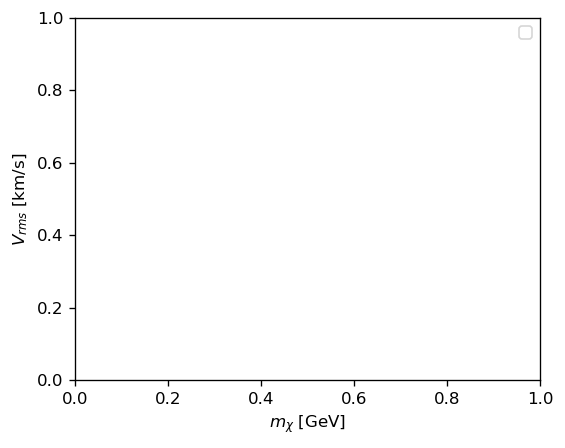

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(dpi=120, figsize=(5,4))
fit_median = {}
for filename in os.listdir(''):
    # one assumes all .npy file in current directory have m_chi*V_rms*.npy
    # format.
    if ".npy" in filename:
        real_value = filename.split(sep="-")
        fit_data = np.load(filename)
        fit_median[filename] = np.median(fit_data, axis=0)
        plt.scatter(fit_data[:,0], fit_data[:,1]/1000, 
        label=f'{fit_data.shape[0]} fits', s=0.2)
        plt.errorbar(fit_median[filename][0], fit_median[filename][1]/1000,
         xerr=np.std(fit_data[:,0]), yerr=np.std(fit_data[:,1])/1000, lw=1)
        plt.scatter(float(real_value[0][5:]), float(real_value[1][5:])/1000,
         c='k', label='real', s=10)
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.ylabel(r"$V_{rms}$ [km/s]")
plt.legend()
plt.show()

The distribution of scatter points from upper left to lower right comes from the degeneracy of the effects of m_chi and V_rms on dTb。

24 v_streams will be generated for m_chi = 0.20156128597891154 GeV and V_rms = 34944.43068580591 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:08.492435 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------
24 v_streams will be generated for m_chi = 0.049968797917641555 GeV and V_rms = 34985.49211127436 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:09.618697 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------
24 v_streams will be generated for m_chi = 0.04982713652709788 GeV and V_rms = 42923.57742184648 m/s...
Sampling 24 dTb's by 24 CPUs parallelly...
It costs 0:00:08.792660 to calculate dTb of 24 different initial_v_streams by 24 CPUs.
---------------------------------------------


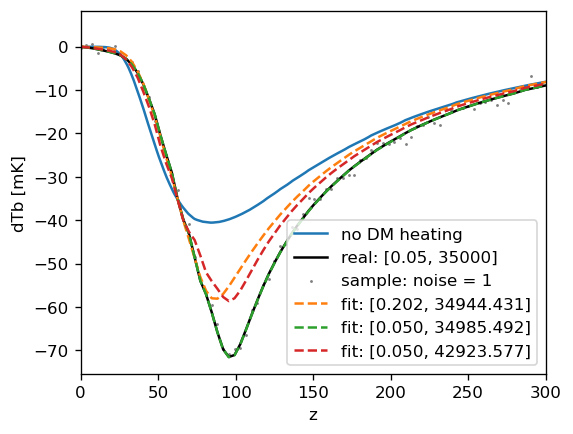

In [3]:
import ares
fig = plt.figure(dpi=120, figsize=(5,4))

pf = \
    {
        'radiative_transfer': False,
        'verbose': False,
        'dark_matter_heating': False,
        'include_cgm': False,
        'initial_redshift': 1010,
        'include_He': True
    }
sim = ares.simulations.Global21cm(**pf)
sim.run()
plt.plot(sim.history['z'], sim.history['dTb'], label="no DM heating")

plt.plot(z_sample, dTb_accurate, label=f'real: [{m_chi_true}, {V_rms_true}]',
 c='k')
plt.scatter(z_sample, dTb_sample[0], label=f'sample: noise = {noise}', s=0.5,
 c='grey')

for filename in os.listdir():
    # one assumes all .npy file in current directory
    # have m_chi*V_rms*.npy format.
    if ".npy" in filename:
        dTb_fit = interp_dTb(param=fit_median[filename], z=z_sample,
         cores=cores, N_v_streams=N_v_streams, verbose=1)
        plt.plot(z_sample, dTb_fit, label=
        f'fit: [{fit_median[filename][0]:.3f}, {fit_median[filename][1]:.3f}]', 
        linestyle='--')
plt.xlabel('z')
plt.ylabel('dTb [mK]')
plt.xlim(0,300)
plt.legend()
plt.show()

It can be seen from the figure that the fitted curve coincides with the noise-free curve to a very high degree.